In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [32]:
library(repr)
library(tidymodels)
library(ggplot2)

In [9]:
bio_data_raw <- read.csv("https://query.data.world/s/imgbaef65gh3n3izy55rucau2nxued?dws=00000", header=TRUE, stringsAsFactors=FALSE)
bio_data_raw

County,Category,Taxonomic.Group,Taxonomic.Subgroup,Scientific.Name,Common.Name,Year.Last.Documented,NY.Listing.Status,Federal.Listing.Status,State.Conservation.Rank,Global.Conservation.Rank,Distribution.Status
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Albany,Animal,Amphibians,Salamanders,Pseudotriton ruber,Red Salamander,1990-1999,Game with no open season,not listed,S3S4,G5,Recently Confirmed
Albany,Animal,Amphibians,Frogs and Toads,Lithobates palustris,Pickerel Frog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
Albany,Animal,Amphibians,Frogs and Toads,Lithobates clamitans,Green Frog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
Albany,Animal,Amphibians,Frogs and Toads,Lithobates catesbeianus,Bullfrog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
Albany,Animal,Amphibians,Salamanders,Notophthalmus viridescens,Eastern Newt,1990-1999,Game with no open season,not listed,S5,G5,Recently Confirmed
Albany,Animal,Amphibians,Salamanders,Hemidactylium scutatum,Four-toed Salamander,1990-1999,Game with no open season,not listed,S5,G5,Recently Confirmed
Albany,Animal,Amphibians,Frogs and Toads,Hyla versicolor,Gray Treefrog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
Albany,Animal,Amphibians,Salamanders,Plethodon glutinosus,Northern Slimy Salamander,1990-1999,Game with no open season,not listed,S5,G5,Recently Confirmed
Albany,Animal,Amphibians,Salamanders,Gyrinophilus porphyriticus,Spring Salamander,1990-1999,Game with no open season,not listed,S5,G5,Recently Confirmed


In [18]:
count(bio_data_raw)

n
<int>
20017


In [14]:
county_counts <- table(bio_data_raw$County)
county_counts


                              Albany                             Allegany 
                                 395                                  235 
Atlantic Ocean and Long Island Sound                                Bronx 
                                  18                                  280 
                              Broome                          Cattaraugus 
                                 243                                  337 
                              Cayuga                           Chautauqua 
                                 336                                  316 
                             Chemung                             Chenango 
                                 275                                  241 
                             Clinton                             Columbia 
                                 364                                  330 
                            Cortland                     Counties Unknown 
                        

In [ ]:
For our data, we will omit any counties that consist only of marine life, counties that are not listed, and counties that are not known. This will ensure that our classification will not be scewed by smaller numbers or further discrepancies associated with a small number of sightings. 

In [19]:

bio_data <- subset(bio_data_raw, !(County %in% c("not listed", "Lake Erie Open Waters", "Lake Ontario Open Waters", "Counties Unknown"
                                        , "Atlantic Ocean and Long Island Sound")))

bio_data
count(bio_data)

,County,Category,Taxonomic.Group,Taxonomic.Subgroup,Scientific.Name,Common.Name,Year.Last.Documented,NY.Listing.Status,Federal.Listing.Status,State.Conservation.Rank,Global.Conservation.Rank,Distribution.Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Albany,Animal,Amphibians,Salamanders,Pseudotriton ruber,Red Salamander,1990-1999,Game with no open season,not listed,S3S4,G5,Recently Confirmed
2,Albany,Animal,Amphibians,Frogs and Toads,Lithobates palustris,Pickerel Frog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
3,Albany,Animal,Amphibians,Frogs and Toads,Lithobates clamitans,Green Frog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
4,Albany,Animal,Amphibians,Frogs and Toads,Lithobates catesbeianus,Bullfrog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
5,Albany,Animal,Amphibians,Salamanders,Notophthalmus viridescens,Eastern Newt,1990-1999,Game with no open season,not listed,S5,G5,Recently Confirmed
6,Albany,Animal,Amphibians,Salamanders,Hemidactylium scutatum,Four-toed Salamander,1990-1999,Game with no open season,not listed,S5,G5,Recently Confirmed
7,Albany,Animal,Amphibians,Frogs and Toads,Hyla versicolor,Gray Treefrog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
8,Albany,Animal,Amphibians,Salamanders,Plethodon glutinosus,Northern Slimy Salamander,1990-1999,Game with no open season,not listed,S5,G5,Recently Confirmed
9,Albany,Animal,Amphibians,Salamanders,Gyrinophilus porphyriticus,Spring Salamander,1990-1999,Game with no open season,not listed,S5,G5,Recently Confirmed


n
<int>
19975


In [20]:
county_counts2 <- table(bio_data$County)
county_counts2


      Albany     Allegany        Bronx       Broome  Cattaraugus       Cayuga 
         395          235          280          243          337          336 
  Chautauqua      Chemung     Chenango      Clinton     Columbia     Cortland 
         316          275          241          364          330          237 
    Delaware     Dutchess         Erie        Essex     Franklin       Fulton 
         261          420          418          478          320          218 
     Genesee       Greene     Hamilton     Herkimer    Jefferson        Kings 
         324          314          295          307          418          215 
       Lewis   Livingston      Madison       Monroe   Montgomery       Nassau 
         320          309          273          393          190          437 
    New York      Niagara       Oneida     Onondaga      Ontario       Orange 
         151          324          382          383          286          462 
     Orleans       Oswego       Otsego       Putnam

In [23]:
This plot shows the amount of species sightings per county that we will be using 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: This plot
         ^


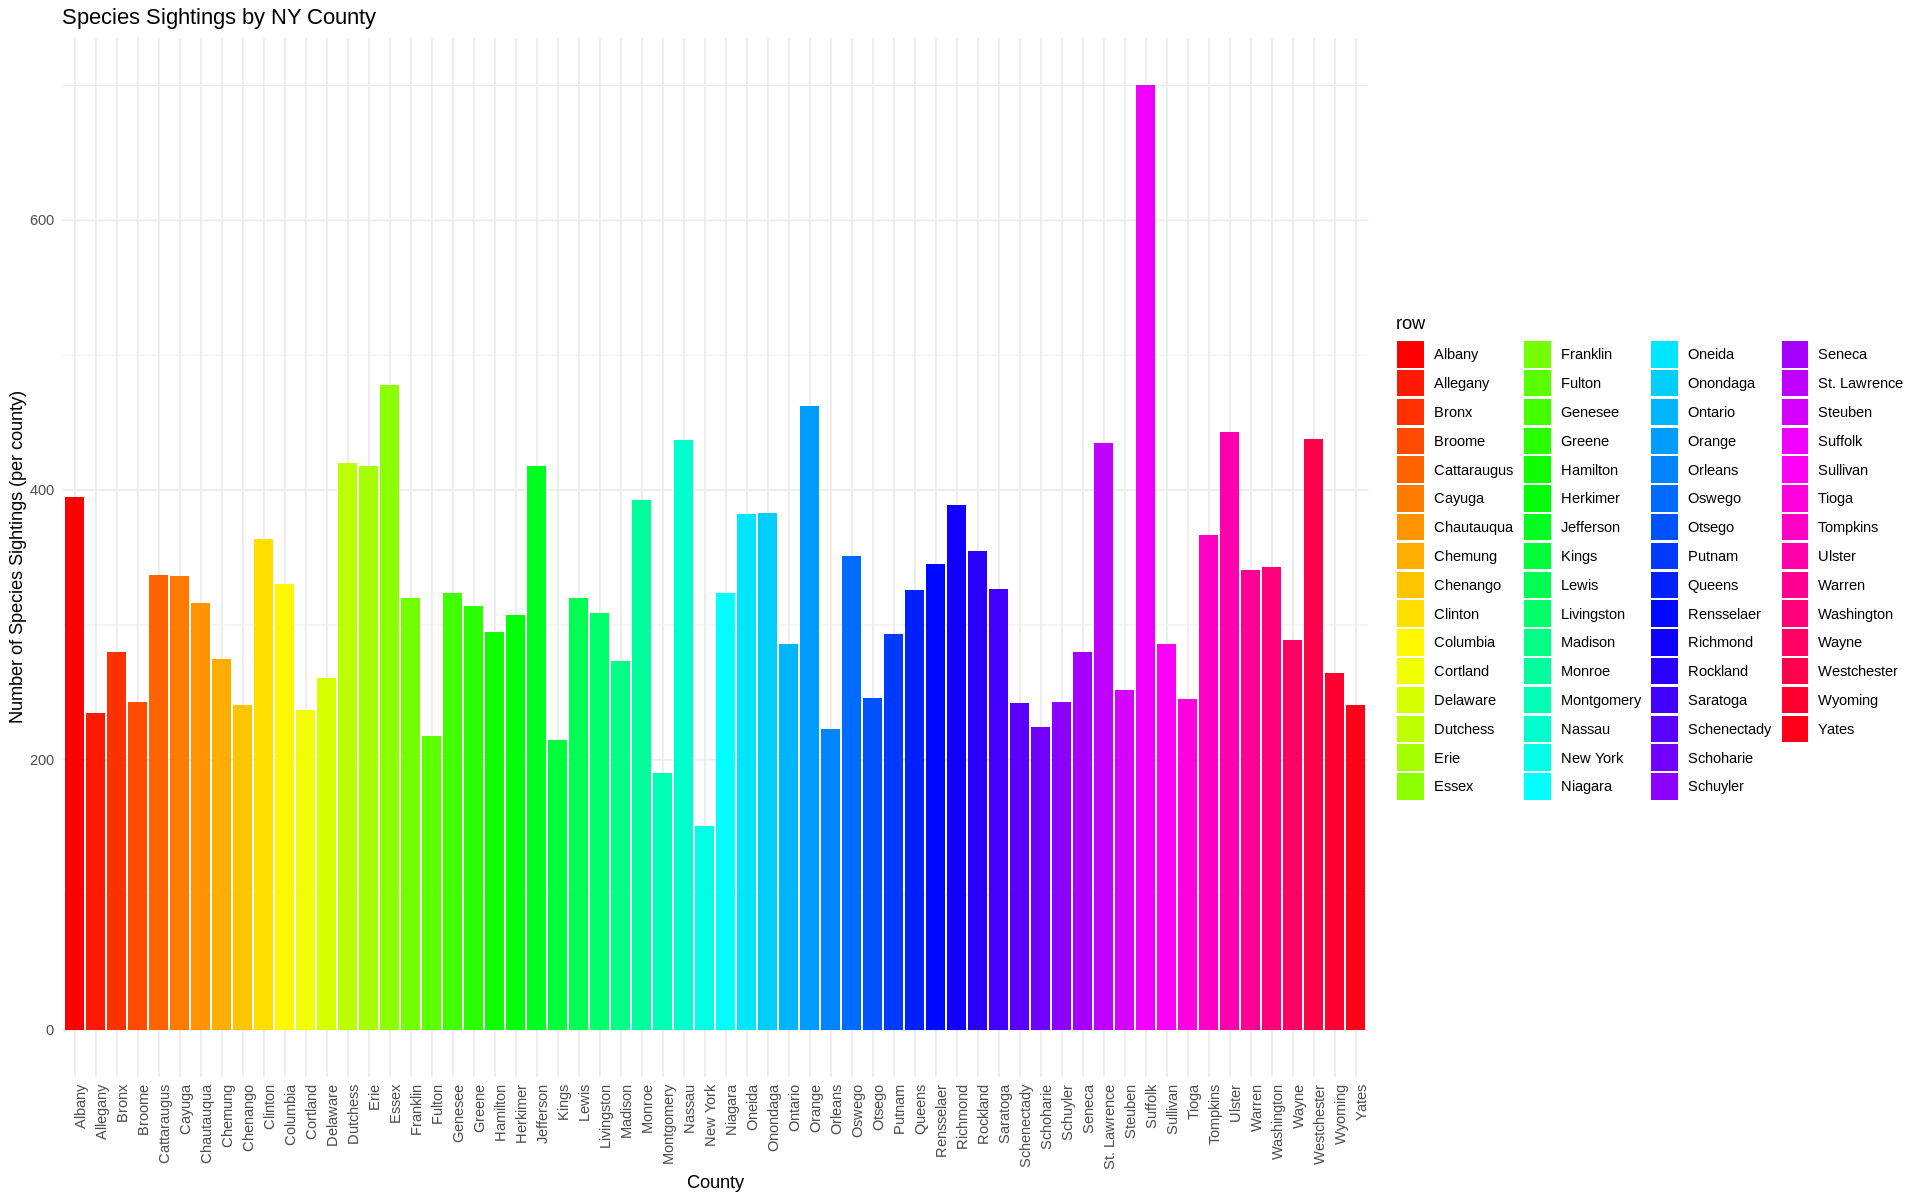

In [39]:
County_counts2_data <- data.frame(row = names(county_counts2), count = as.numeric(county_counts2))
#County_counts2_data

options(repr.plot.width = 16, repr.plot.height = 10) 
county_counts_plot <- ggplot(County_counts2_data, aes(x = row, y = count, fill = row)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = rainbow(length(county_counts2))) +
  labs(x = "County", y = "Number of Species Sightings (per county)", title = "Species Sightings by NY County") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

county_counts_plot




